# Analisando a representação construída para o texto das leis

A pergunta central que este notebook se propõe a responder é: as representações que a gente constrói pro texto das leis faz sentido? Como avaliar qual representação é melhor? Uma espécie de teste de sanidade pras representações, ou uma análise exploratória destas representações.

Inicialmente, pensei em duas formas de realizar este teste: visualizando e clusterizando os textos e ver se estes clusters correspondem mais ou menos às categorias das leis; observando se o texto das leis e seu resumo possuem representações similares (ou pelo menos uma relação algébrica clara entre texto e resumo)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importa arquivos
# Descomente pra usar no Google Colab
# from google.colab import files
# import os.path

arq_leis = 'leis.json'

# if (not os.path.isfile(arq_leis)):
#     uploaded = files.upload()

In [3]:
leis = pd.read_json(arq_leis)
leis.drop(['documento'], inplace=True, axis=1)
print(leis.info())
print(leis.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6033 entries, 0 to 6032
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   titulo     6033 non-null   object
 1   categoria  6033 non-null   object
 2   resumo     6033 non-null   object
 3   texto      6033 non-null   object
dtypes: object(4)
memory usage: 188.7+ KB
None
titulo       6033
categoria       8
resumo       4961
texto        6029
dtype: int64


In [4]:
leis

,titulo,categoria,resumo,texto
0,"DECRETO Nº 8854, de 28 de fevereiro de 2013.",Decretos,DELEGA COMPETÊNCIA À SECRETARIA MUNICIPAL DE P...,"O PREFEITO MUNICIPAL DE FEIRA DE SANTANA, Esta..."
1,"DECRETO Nº 8849, de 25 de fevereiro de 2013.",Decretos,ABRE CRÉDITO SUPLEMENTAR AO ORÇAMENTO DO MUNIC...,"O PREFEITO MUNICIPAL DE FEIRA DE SANTANA, Esta..."
2,"DECRETO Nº 8853, de 27 de fevereiro de 2013.",Decretos,NOMEIA MEMBROS DO CONSELHO MUNICIPAL DE DESENV...,"O PREFEITO MUNICIPAL DE FEIRA DE SANTANA, Esta..."
3,"DECRETO Nº 8967, de 17 de julho de 2013",Decretos,ALTERA O QUADRO DE DETALHAMENTO DE DESPESA DO ...,"O PREFEITO MUNICIPAL DE FEIRA DE SANTANA, Esta..."
4,"DECRETO Nº 8982, de 30 de julho de 2013",Decretos,AUTORIZA O FUNCIONAMENTO DE ESTABELECIMENTOS C...,"O PREFEITO MUNICIPAL DE FEIRA DE SANTANA, Esta..."
...,...,...,...,...
6028,RESOLUÇÃO Nº 125/1980,Resoluções,DISPÕE SOBRE A CONCESSÃO DE TÍTULO DE CIDADÃO ...,Faço saber que a Câmara Municipal aprovou e eu...
6029,RESOLUÇÃO Nº 403/2003,Resoluções,AUTORIZA A MESA DIRETIVA DO PODER LEGISLATIVO ...,"A CÂMARA MUNICIPAL DE FEIRA DE SANTANA, Estado..."
6030,RESOLUÇÃO Nº 492/2014,Resoluções,INSTITUI A SEGUNDA SEMANA DO MÊS DE AGOSTO EM ...,"A CÂMARA MUNICIPAL DE FEIRA DE SANTANA, Estado..."
6031,RESOLUÇÃO Nº 382/2001,Resoluções,CRIA A MEDALHA VEREADOR DIVAL FIGUEIREDO MACHA...,"A CÂMARA MUNICIPAL DE FEIRA DE SANTANA, Estado..."


In [5]:
# Exemplo de texto de lei
leis.loc[len(leis)-1, 'texto']

'A CÂMARA MUNICIPAL DE FEIRA DE SANTANA, Estado da Bahia, na conformidade do artigo 70, Inciso V, da Lei Municipal nº37, de 05 de Abril de 1990 e, artigos 287, § 2º e, 420, do Regimento Interno, promulga a seguinte Resolução:\n\nArt. 1ºDê-se aos dispositivos abaixo mencionados, da Resolução nº393/2002 - Regimento Interno, as seguintes redações:\n\n"Art. 7º A Mesa Diretora da Câmara compor-se-á do Presidente, Primeiro e Segundo Secretários, com mandato de 02 ( dois ) anos, admitida a recondução para a eleição subsequente.\n\n§ 4º Se, hora regimental, não estiver presente o Presidente, abrirá os trabalhos o Vice-Presidente ou, na falta deste, o Primeiro ou Segundo Secretários, na sequência, ou ainda, caso estes não estejam presentes, o Vereador mais votado nas eleições municipais."\n\n"Art. 33 Compete, privativamente, ao Vice-Presidente:"\n\n"Art. 36 ...\n\nI - ...\n\ne) acompanhar e supervisionar a Ata da Sessão, proceder a sua leitura e assiná-la depois do Presidente e do Vice-Presiden

In [6]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re
# import unicodedata

def limpa_texto(text, return_string=True) -> str or list:
    if (type(text) == float):
        return ''

    # Remove pontuacao, digitos e espacos
    text = re.sub(r'[0-9]+', ' NUM ', text.lower())
    text = ' '.join(re.findall(r'\b[A-Za-zÀ-ú]+[-A-Za-zÀ-ú]*', text))
    
    # Remove acentos, cedilhas etc
    # nfkd_form = unicodedata.normalize('NFKD', text)
    # text = ''.join([char for char in nfkd_form if not unicodedata.combining(char)])

    # Remove stopwords
    my_stopwords = stopwords.words('portuguese')
    my_words = ['desta', 'destas', 'deste', 'destes', 'qualquer', 'das', 'seguintes', 
    'i', 'ii', 'iii', 'iv', 'v', 'vi', 'vii', 'viii', 'ix', 'x',
    'xi', 'xii', 'xiii', 'xiv', 'xv', 'xvi', 'xvii', 'xviii', 'xix', 'xx',
    'b', 'c', 'd', 'f', 'g', 'h', 'j', 'k', 'l', 'm', 'n', 'p', 'q', 'r', 's', 
    't', 'u', 'w', 'x', 'y', 'z', 'lt', 'ol', 'ugl', 'mg']
    my_stopwords = my_stopwords + my_words

    text = [word for word in text.split() if word not in my_stopwords]

    if return_string:
        return ' '.join(text)
    else:
        return text

    # Outra colecao de palavras que podem ser stopwords no contexto
    # das leis municipais de Feira de Santana, Bahia:

    # other_words = ['feira', 'santana', 'art', 'municipal', 'lei',
    # 'prefeito', 'câmara', 'municipio', 'data', 'seguinte', 'disposições',
    # 'estado', 'bahia', 'vigor', 'secretário', 'decreto', 'projeto', 
    # 'contrário', 'presidente', 'artigo', 'parágrafo', 'executivo', 
    # 'gabinete', 'único', 'sanciono', 'autoria', 'através', 'vice', 'autor',
    # 'decretou', 'execução', 'sobre', 'decorrentes', 'decreta', 'resolução',
    # 'geral', 'uso', 'ato', 'diretiva', 'exercício', 'meio', 'correrão']

[nltk_data] Downloading package stopwords to /home/guiga/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Construindo representações para o texto

In [7]:
leis['texto_limpo'] = leis['texto'].apply(limpa_texto)

In [8]:
# Constrói matriz de documentos baseado em 
# contagem dos termos por documento
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
vectorizer = CountVectorizer()
representacao_contagem = vectorizer.fit_transform(leis['texto_limpo'])
representacao_contagem

<6033x30208 sparse matrix of type '<class 'numpy.int64'>'
	with 625445 stored elements in Compressed Sparse Row format>

In [15]:
# Construindo representação baseada em TF-IDF
transformer = TfidfTransformer()
representacao_tfidf = transformer.fit_transform(representacao_contagem)
representacao_tfidf

<6033x30208 sparse matrix of type '<class 'numpy.float64'>'
	with 625445 stored elements in Compressed Sparse Row format>

In [17]:
# Construindo representação TF-IDF com normalização 
# (ajuda no SVD)
transformer_normalizado = TfidfTransformer(sublinear_tf=True)
tfidf_normalizado = transformer_normalizado.fit_transform(representacao_contagem)
tfidf_normalizado

<6033x30208 sparse matrix of type '<class 'numpy.float64'>'
	with 625445 stored elements in Compressed Sparse Row format>

In [10]:
# # Construindo representação de palavras
# # baseada na contagem das palavras vizinhas
# # (hipótese linguística distribucional: 
# #  conhecerás as palavras pela companhia que elas têm)

# # Transformar nosso set pra um dicionário de indices
# idx_palavras = {}
# for i, palavra in enumerate(palavras_unicas):
#     idx_palavras[palavra] = i

In [11]:
# # Criando matriz do embedding
# vetores = np.zeros((len(palavras_unicas), len(palavras_unicas)), dtype=np.int16)
# vetores

In [12]:
# # Definir ate qual distancia utilizar
# vizinhanca = 2
# for idx, palavra in enumerate(texto_limpo):
#     for i in range(1, vizinhanca):
#         pal_vizinha = texto_limpo[idx+i]

#         idx_pal = idx_palavras[palavra]
#         idx_vizinha = idx_palavras[pal_vizinha]

#         vetores[idx_pal, idx_vizinha] += 1
#         vetores[idx_vizinha, idx_pal] += 1
#     if (idx == len(texto_limpo) - vizinhanca):
#         break
# vetores

### Análise da representação das palavras

In [13]:
# idx_palavras_rand = np.random.randint(len(palavras_unicas), size=10)

# def mostra_palavras_semelhantes(idx: int, semelhantes: list, lista_palavras: list):
#     pal = lista_palavras[idx]
#     print(f'Lista de palavras semelhantes a {pal} - {idx}:')
#     for i in semelhantes:
#         pal = lista_palavras[i]
#         print(f'{pal} - {i}')
#     print('\n- - - - - \n\n')

# lista_palavras = list(idx_palavras.keys())
# for idx in idx_palavras_rand:
#     palavras_semelhantes = np.argsort(cos_sim_palavras[idx].toarray())
#     semelhantes = palavras_semelhantes[0][-10:-1]
#     mostra_palavras_semelhantes(idx, semelhantes, lista_palavras)

Neste corpus, pra algumas palavras, a hipótese distribucional parece funcionar bem, pra outras nem tanto, pra outras não funciona.

Semelhantes a "outorgar" temos: "permutar", "editar", "contratar", "doar", "conceder", "dispensar", "celebrar", "subscrever", "proibir". Embora a semântica (significado) não seja necessariamente próxima, todas as palavras são verbos, então a sintaxe é próxima. Semelhantes a "ibitita": "axixa", "ibirarema", "peritoro", "piracaia", "igarata", "erechim", "itaperuna", "piata", "vandinha". Todos parecem nomes de locais.

Existem casos horríveis. Semelhantes à "coesao" temos: "sedeso", "his", "ctps", "zeis", "pnas", "cgfmhis", "snhis", "acemas". O que significam essas palavras? Talvez seja útil melhorar a qualidade do pré-processamento pra melhorar na indexação. Semelhantes à "separando" temos: "agrossilvopastoris", "cemiteriais", "solidos", "molhados", "domiciliares", "volumosos", "baldios", "antecedencia", "dimensao".

Há casos mistos. Semelhantes `a "trasporte" (note o erro) temos: "meia" (talvez meia passagem?), "transporte" (a palavra correta aparece em segundo), "roletas", "vala" (?), "trafegos", "convencional" (?), "edificar" (?), "passageiros", "fretado".

Talvez o corpus seja pequeno demais pra encontrar as relações entre as palavras só contando? Há de se testar se não é melhor então trabalhar com vetores de palavras, mesmo aprendidos em um corpus pequeno. Segundo o paper "Don't count, predict! a systematic comparison of context-counting vs. context-predicting semantic vectors (2014) - Baroni, Dinu, Kruszeweski", predizer é melhor que contar. Há de se testar se neste nosso contexto isso também se verifica.

Por hora, vamos testar se a busca melhora ou não utilizando as palavras. Então vamos construir a representação das leis.

### Construindo representação das leis com base na hipotese distribucional

In [14]:
# # Cada lei vai ser a soma dos vetores de suas palavras
# # Usando np.zeros gasta muita memoria, mas csr_matrix eh muito lento
# leis_vetores_palavras = np.zeros((len(leis['texto_limpo']), vetores.shape[1]))
# for idx, lei in enumerate(leis['texto_limpo']):
#     for palavra in lei.split():
#         idx_palavra = idx_palavras[palavra]
#         leis_vetores_palavras[idx] += vetores[idx_palavra]
# leis_vetores_palavras

NameError: name 'np' is not defined

# Visualizando e clusterizando a representação dos textos

Primeiro, vamos visualizar a representação de cada lei e observar se há clusters naturais. Depois, vamos clusterizar estas representações e analisar se estes clusters formados fazem sentido com as categorias atribuídas a cada Lei.

### Visualizando as representações

Pra visualizar, temos que antes reduzir a dimensão das representações pra 2 ou 3 dimensões. Por praticidade na visualização e interpretação, vamos visualizar em 2 dimensões. Pra reduzir a 2 dimensões, existem alguns métodos. Você pode visualizar alguns [nesta página do Sklearn.](https://scikit-learn.org/stable/modules/decomposition.html#decompositions) Um destaque especial pra Truncated SVD (LSA) e t-SNE. Um problema interessante e relacionado é aplicar LDA (Latent Dirichlet Allocation) ao corpus das Leis e verificar quais palavras caracterizam cada categoria das Leis.

t-SNE é um método mais complicado porque exige alguma afinação de parâmetros e algumas tentativas pra visualizar algum resultado interessante e descobrir se essa visualização realmente faz sentido ou se só foi uma configuração espúria do algoritmo. Mais sobre isso [aqui](https://distill.pub/2016/misread-tsne/).

Vamos começar por Truncated SVD (LSA). É semelhante ao PCA, porém as features não precisam estar normalizadas, ou seja, o centro da distribuição não precisa ser 0.

In [25]:
import numpy as np
seed = np.random.randint(1000)
print(f'Semente aleatoria: {seed}')

from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(random_state=seed)
tfidf_reduzido = svd.fit_transform(representacao_tfidf)
print(f'Retenção de variância no TF-IDF: \
      {svd.explained_variance_ratio_.sum()*100}%')

Semente aleatoria: 749
Retenção de variância no TF-IDF:       15.338632431701797%


In [26]:
tfidf_normalizado_reduzido = svd.fit_transform(tfidf_normalizado)
print(f'Retenção de variância no TF-IDF normalizado: \
      {svd.explained_variance_ratio_.sum()*100}%')

Retenção de variância no TF-IDF normalizado:       13.912205847972697%


## Plot
Após reduzir a dimensão das representações, vamos plotar e tentar identificar os clusters visualmente, por meio de um algoritmo de clustering e comparar com os clusters reais (categoria da Lei).

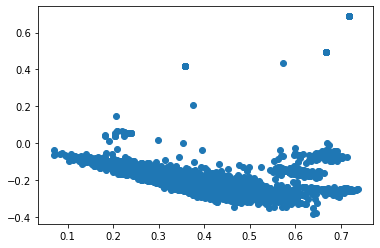

In [27]:
import matplotlib.pyplot as plt
plt.scatter(tfidf_reduzido[:, 0], tfidf_reduzido[:, 1])

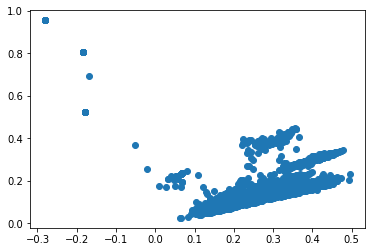

In [30]:
plt.scatter(tfidf_normalizado_reduzido[:, 1], tfidf_normalizado_reduzido[:, 0])
# TODO: Limitar valores do plot de forma a não mostrar os outliers e ampliar onde tá a massa de textos